# Russel 2000 週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'RUT'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00-04:00,2075.889893,2081.320068,2064.199951,2077.979980,4305020000,0.0,0.0
2022-03-28 00:00:00-04:00,2078.300049,2138.449951,2049.540039,2091.110107,23169700000,0.0,0.0
2022-04-04 00:00:00-04:00,2091.530029,2103.360107,1984.150024,1994.560059,23239490000,0.0,0.0
2022-04-11 00:00:00-04:00,1993.530029,2034.219971,1976.589966,2004.979980,16329620000,0.0,0.0
2022-04-18 00:00:00-04:00,2003.270020,2060.080078,1939.339966,1940.660034,21597890000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,2200.709961,2202.060059,2126.080078,2163.070068,26733210000,0.0,0.0
2025-03-03 00:00:00-05:00,2168.020020,2173.570068,2033.689941,2075.479980,27908150000,0.0,0.0
2025-03-10 00:00:00-04:00,2058.090088,2058.090088,1984.920044,2044.099976,27732600000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23 00:00:00-04:00,1100.140015,1180.319946,1075.849976,1131.989990,22268670000,0.0,0.0
2020-03-30 00:00:00-04:00,1134.140015,1164.630005,1035.390015,1052.050049,30852490000,0.0,0.0
2020-04-06 00:00:00-04:00,1085.880005,1250.130005,1085.880005,1246.729980,27229510000,0.0,0.0
2020-04-13 00:00:00-04:00,1240.910034,1251.880005,1154.520020,1229.099976,27176880000,0.0,0.0
2020-04-20 00:00:00-04:00,1220.630005,1238.310059,1173.910034,1233.050049,26590900000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00-05:00,2200.709961,2202.060059,2126.080078,2163.070068,26733210000,0.0,0.0
2025-03-03 00:00:00-05:00,2168.020020,2173.570068,2033.689941,2075.479980,27908150000,0.0,0.0
2025-03-10 00:00:00-04:00,2058.090088,2058.090088,1984.920044,2044.099976,27732600000,0.0,0.0


## Moving Median

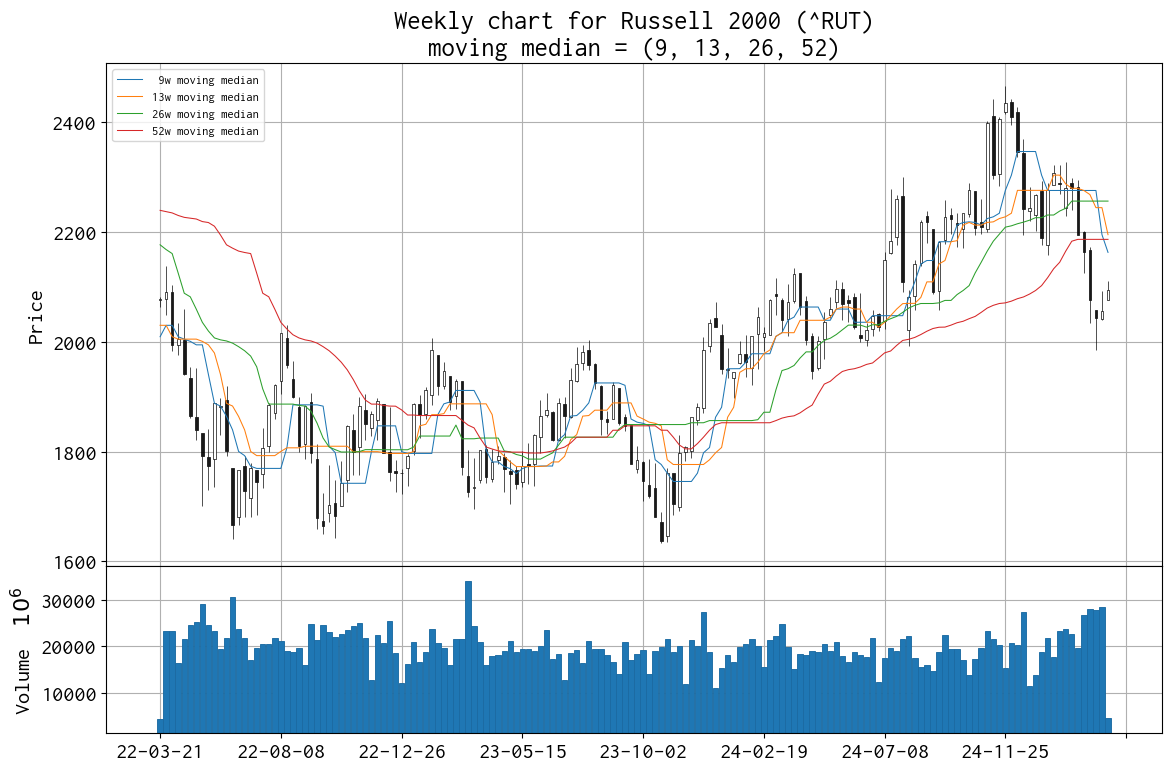

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00-04:00,2041.52002,2092.030029,2039.959961,2056.979980,28404010000,0.0,0.0
2025-03-24 00:00:00-04:00,2075.47998,2110.540039,2075.479980,2095.378662,4517990000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-17 00:00:00-04:00    2056.979980
2025-03-24 00:00:00-04:00    2095.378662
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-17 00:00:00-04:00          NaN
2025-03-24 00:00:00-04:00    38.398682
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00-04:00    19.898682
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-02-24 00:00:00-05:00    2275.879883
2025-03-03 00:00:00-05:00    2275.879883
2025-03-10 00:00:00-04:00    2275.879883
2025-03-17 00:00:00-04:00    2195.350098
2025-03-24 00:00:00-04:00    2163.070068
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-02-24 00:00:00-05:00    2275.879883
2025-03-03 00:00:00-05:00    2268.469971
2025-03-10 00:00:00-04:00    2244.590088
2025-03-17 00:00:00-04:00    2244.590088
2025-03-24 00:00:00-04:00    2195.350098
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-02-24 00:00:00-05:00    2256.530029
2025-03-03 00:00:00-05:00    2256.530029
2025-03-10 00:00:00-04:00    2256.530029
2025-03-17 00:00:00-04:00    2256.530029
2025-03-24 00:00:00-04:00    2256.530029
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-02-24 00:00:00-05:00    2186.790039
2025-03-03 00:00:00-05:00    2186.790039
2025-03-10 00:00:00-04:00    2186.790039
2025-03-17 00:00:00-04:00    2186.790039
2025-03-24 00:00:00-04:00    2186.790039
Name: Close, dtype: float64

## Robust Bollinger bands

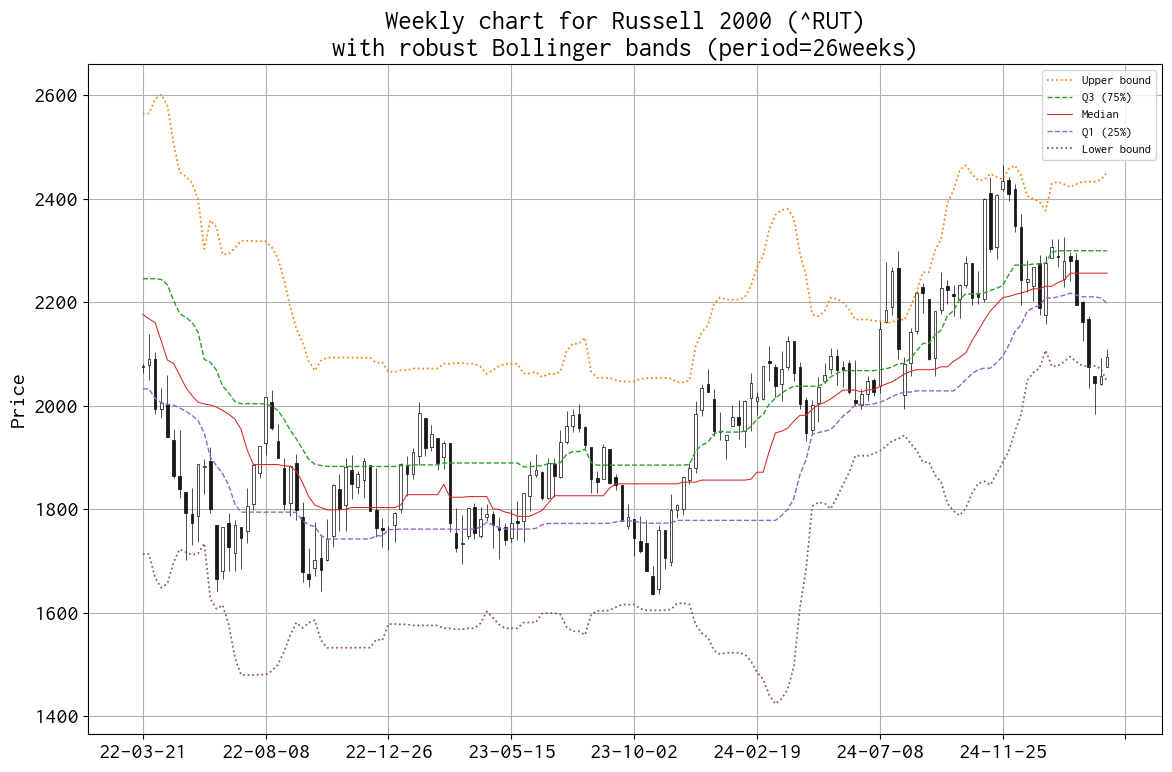

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

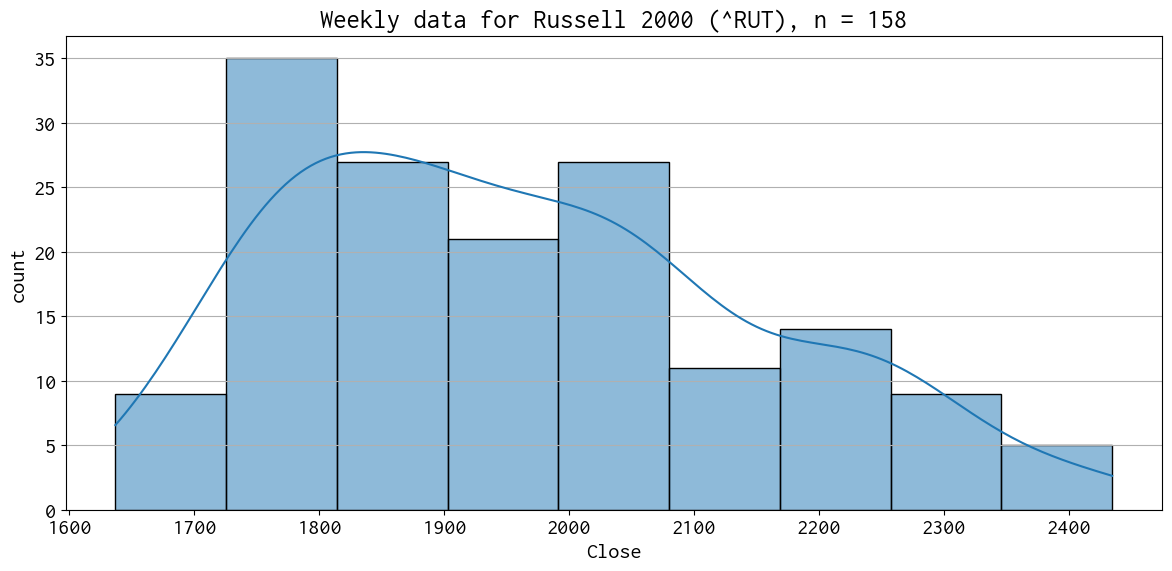

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()